#### The purpose of this notebook is to answer simulated business questions, questions that often arise in real-life business scenarios and in the job market, more specifically to perform various **statistical tests** to respond to such scenarios, to assist in data-driven decision-making rather than random decision-making.

##### The dataset used is available in the `data/raw` folder, and the README.md file in this repository contains a link to the dataset on Kaggle.

# Introduction to Exploratory Data Analysis

In [1]:
# development libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

# visual settings
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

# graphic style
plt.style.use("seaborn-v0_8")
sns.set_style("whitegrid")
sns.set_palette("Set1")

In [2]:
# importing the data
DATA_RAW = '../data/raw/shopping_trends.csv'
df = pd.read_csv(DATA_RAW)

df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1000,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1000,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1000,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5000,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7000,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
print(f'Number of columns: {df.shape[1]}')
print(f'Number of rows: {df.shape[0]}')

Number of columns: 19
Number of rows: 3900


In [4]:
# columns name
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

### Dataset Glossary (Column-wise)
- **Customer ID** - Unique identifier for each customer
- **Age** - Age of the customer
- **Gender** - Gender of the customer (Male/Female)
- **Item Purchased** - The item purchased by the customer
- **Category** - Category of the item purchased
- **Purchase Amount (USD)** - The amount of the purchase in USD
- **Location** - Location where the purchase was made
- **Size** - Size of the purchased item
- **Color** - Color of the purchased item
- **Season** - Season during which the purchase was made
- **Review Rating** - Rating given by the customer for the purchased item
- **Subscription Status** - Indicates if the customer has a subscription (Yes/No)
- **Shipping Type** - Type of shipping chosen by the customer
- **Discount Applied** - Indicates if a discount was applied to the purchase (Yes/No)
- **Promo Code Used** - Indicates if a promo code was used for the purchase (Yes/No)
- **Previous Purchases** - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction
- **Payment Method** - Customer's most preferred payment method
- **Frequency of Purchases** - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

In [5]:
# general information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [6]:
# checking for missing values
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [7]:
# checking for duplicate values
df.duplicated().sum()

np.int64(0)

In [8]:
# converting to a data type that makes sense
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].astype('float64')
df['Purchase Amount (USD)'].dtype

dtype('float64')

### Descriptive statistics

In [9]:
# description for numeric variables
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,"3,900.0000","3,900.0000","3,900.0000","3,900.0000","3,900.0000"
mean,"1,950.5000",44.0685,59.7644,3.7499,25.3515
std,"1,125.9774",15.2076,23.6854,0.7162,14.4471
min,1.0000,18.0000,20.0000,2.5000,1.0000
25%,975.7500,31.0000,39.0000,3.1000,13.0000
50%,"1,950.5000",44.0000,60.0000,3.7000,25.0000
75%,"2,925.2500",57.0000,81.0000,4.4000,38.0000
max,"3,900.0000",70.0000,100.0000,5.0000,50.0000


#### Análise preliminar e escrita da **estatística descritiva** das nossas colunas numericas.

**Customer ID:** Coluna usada como identificador de clientes, analises estatísticas não funcionam aqui.

**Age:** A **média** é de aproximadamente `44` anos, e a **mediana** `50%` é de `44` anos, isso sugere uma distribuição de idades relativamente simétrica. A **Dispersão** de `15.20` parece ser consistente, e refletir de fato o comportamento dessa coluna, pois `Q1 (25%) de 31`, `Q3 (75%) de 57` confirmam isso. Se de fato possuirmos uma distribuição relativamente simétrica (podemos confirmar isso com visualizações posteriormente) isso facilita testes parâmetricos que assumem normalidade.

**Purchase Amount (USD):** Os valores de compras variam de `20 a 100`. Há uma centralidade semelhante a da coluna **Age**, pois a **média** é de `59.76` e a **mediana** é de `60`. A **Dispersão** sendo `23.68`, com um *intervalo interquartil** variando entre `39` a `81`, mostram uma diversidade relativa nos gastos dos clientes.

**Review Rating:** Avaliações que devem variar entre 1 e 5, sendo 1 a pior avaliação para aquele item, e 5 sendo a melhor avaliação para aquele item. Podemos supor que uma avaliação intermediária de 2.5 seria um item nem bom, nem ruim, mas moderado. A **média** das avaliação é `3.75`, isto é, a maioria dos itens possuem uma nota que os considera um pouco melhor que moderado, podermos garantir isso porque seguindo o **desvio padrão** de `0.71` e um **intervalo interquartil** variando entre `3.1` a `4.4`, é bem improvável que essa coluna possua outliers.  
Mas, ter um valor mínimo (min) de 2.5 é a informação mais notável aqui. Suspeito? Se a escala de avaliação esperada fosse de 1.0 a 5.0 (como é comum), ter um mínimo de 2.5 pode indicar que:  
- Não existem avaliações realmente baixas no dataset (clientes muito insatisfeitos).  
- Existe um viés de coleta onde avaliações abaixo de 2.5 não são registradas ou não ocorrem.  
- A escala de avaliação real começa em 2.5 para algum motivo (menos provável para uma escala de satisfação).

**Previous Purchases**
**Range:** Os clientes fizeram de `1` a `50` compras anteriores.
**Centralidade:** A média é de `25.35` e a mediana é `25`. Novamente, boa simetria.
**Dispersão:** O desvio padrão de `14.45` e o intervalo interquartil (de `13` a `38` compras) mostram uma ampla gama de clientes, desde os que compraram poucas vezes até os mais frequentes.
**Valioso:** Esta coluna é excelente para segmentar clientes por frequência e lealdade.


### Preliminary analysis and writing of **descriptive statistics** for our numerical columns.

**Customer ID:** Column used as a customer identifier; statistical analyses do not work here.

**Age:** The **mean** is approximately `44` years, and the **median** `50%` is `44` years, suggesting a relatively symmetrical age distribution. The **dispersion** of `15.20` seems to be consistent and indeed reflects the behavior of this column, as `Q1 (25%) of 31` and `Q3 (75%) of 57` confirm this. If we do indeed have a relatively symmetrical distribution (we can confirm this with visualizations later), this facilitates parametric tests that assume normality.

**Purchase Amount (USD):** Purchase amounts range from `20 to 100`. There is a centrality similar to that of the **Age** column, as the **mean** is `59.76` and the **median** is `60`. The **Dispersion** being `23.68`, with an *interquartile range** varying between `39` and `81`, shows a relative diversity in customer spending.

**Review Rating:** Ratings should range from 1 to 5, with 1 being the worst rating for that item and 5 being the best rating for that item. We can assume that an intermediate rating of 2.5 would be an item that is neither good nor bad, but moderate. The **average** rating is `3.75`, meaning that most items have a rating that considers them slightly better than moderate. We can guarantee this because, following the **standard deviation** of `0.71` and an **interquartile range** varying between `3.1` and `4.4`, it is very unlikely that this column has outliers.  
However, having a minimum value (min) of 2.5 is the most notable information here. Suspicious? If the expected rating scale were from 1.0 to 5.0 (as is common), having a minimum of 2.5 may indicate that:
- There are no really low ratings in the dataset (very dissatisfied customers).  
- There is a collection bias where ratings below 2.5 are not recorded or do not occur.  
- The actual rating scale starts at 2.5 for some reason (less likely for a satisfaction scale).

**Previous Purchases**
**Range:** Customers made between `1` and `50` previous purchases.
**Centrality:** The mean is `25.35` and the median is `25`. Again, good symmetry.
**Dispersion:** The standard deviation of `14.45` and the interquartile range (from `13` to `38` purchases) show a wide range of customers, from those who have purchased a few times to the most frequent.
**Valuable:** This column is excellent for segmenting customers by frequency and loyalty.

### Visual Univariate Analysis


In [10]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

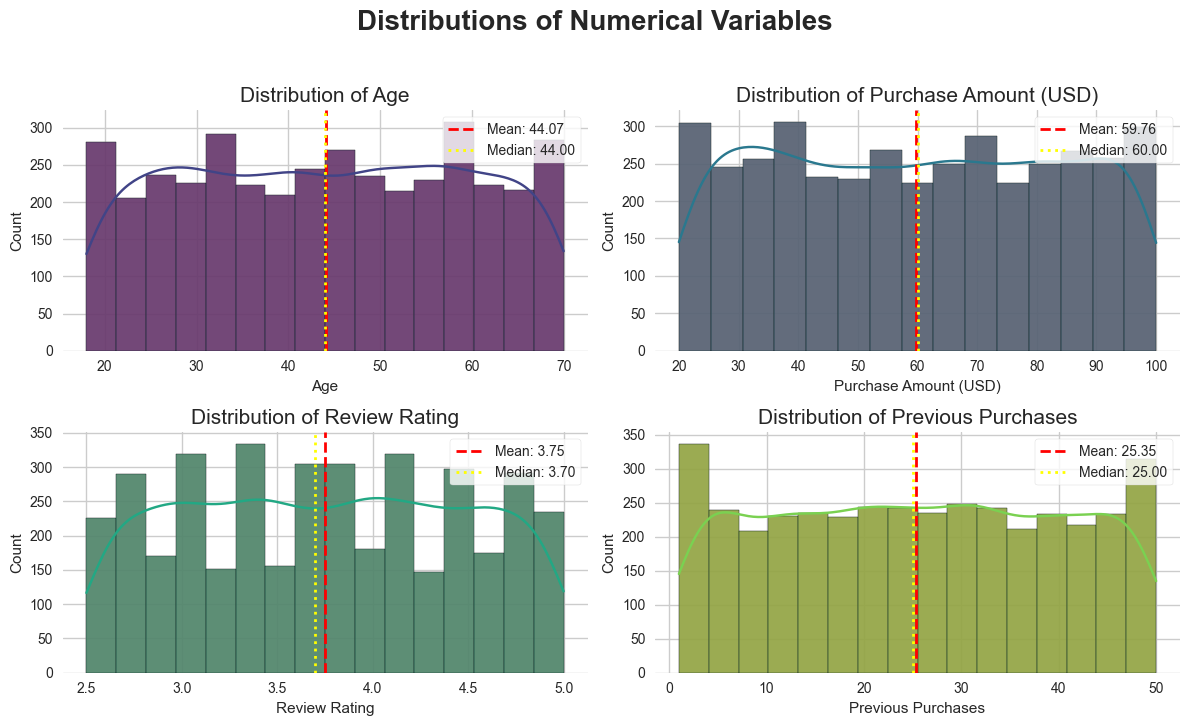

In [11]:
# selecting the numeric columns
cols_numeric_graphics = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# selecting a color for each chart
colors = sns.color_palette("viridis", n_colors=len(cols_numeric_graphics))

# defining the structure of the figure and the axes
fig, axs = plt.subplots(2, 2, figsize=(12, 7), tight_layout=True)


# defining a global title
fig.suptitle("Distributions of Numerical Variables", fontsize=20, weight='bold', y=1.03)


for i, (ax, col) in enumerate(zip(axs.flatten(), cols_numeric_graphics)):
    sns.histplot(data=df, x=col, ax=ax)
    sns.histplot(data=df, x=col, ax=ax, kde=True, color=colors[i], edgecolor='black', alpha=0.7)


    # obtaining the mean and median of the columns used here
    mean_each_variable = df[col].mean()
    median_each_variable = df[col].median()

    # Reference line for the mean and median of each column
    ax.axvline(mean_each_variable, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_each_variable:.2f}')
    ax.axvline(median_each_variable, color='yellow', linestyle=':', linewidth=2, label=f'Median: {median_each_variable:.2f}')

    ax.set_title(f'Distribution of {col}', fontsize=15)

    ax.legend(fontsize=10, loc='upper right', frameon=True)
    
plt.show()

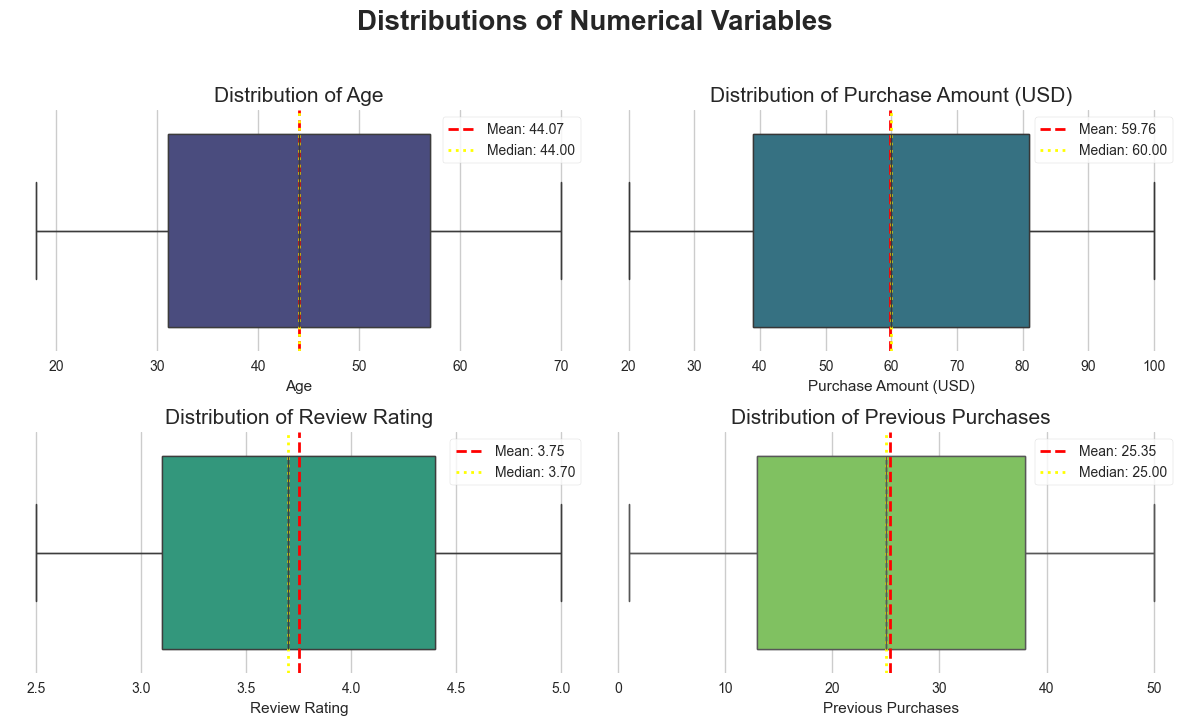

In [12]:
# selecting the numeric columns
cols_numeric_graphics = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# selecting a color for each chart
colors = sns.color_palette("viridis", n_colors=len(cols_numeric_graphics))

# defining the structure of the figure and the axes
fig, axs = plt.subplots(2, 2, figsize=(12, 7), tight_layout=True)


# defining a global title
fig.suptitle("Distributions of Numerical Variables", fontsize=20, weight='bold', y=1.03)


for i, (ax, col) in enumerate(zip(axs.flatten(), cols_numeric_graphics)):
    sns.boxplot(data=df, x=col, ax=ax)
    sns.boxplot(data=df, x=col, ax=ax, color=colors[i])


    # obtaining the mean and median of the columns used here
    mean_each_variable = df[col].mean()
    median_each_variable = df[col].median()

    # Reference line for the mean and median of each column
    ax.axvline(mean_each_variable, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_each_variable:.2f}')
    ax.axvline(median_each_variable, color='yellow', linestyle=':', linewidth=2, label=f'Median: {median_each_variable:.2f}')

    ax.set_title(f'Distribution of {col}', fontsize=15)

    ax.legend(fontsize=10, loc='upper right', frameon=True)
    
plt.show()


#### Observações:
- **Assimetria**: As distribuições possuem uma forma Plasticurtica, ou seja, semelhante a uniforme, isso quer dizer que não teremos problemas com Outliers, a assimetria é minima ou praticamente inexistente.

- Isso significa que não teremos tantos problemas com as suposições de normalidade (da distribuição amostral da média) para a maioria dos testes de hipótese, o Teorema do Limite Central será um grande aliado aqui considerando o tamanho das amostras. Se o tamanho das amostras fossem pequenos ou se tivessemos muita assimetria e valores extremos, muito provavelmente seriam necessárias transformações de dados.

### Observations:
- **Asymmetry**: The distributions have a Plasticurtica shape, that is, similar to uniform, which means that we will not have problems with outliers, the asymmetry is minimal or practically nonexistent.

- This means that we will not have as many problems with assumptions of normality (of the sample distribution of the mean) for most hypothesis tests. The Central Limit Theorem will be a great ally here, considering the size of the samples. If the sample sizes were small or if we had a lot of asymmetry and extreme values, data transformations would most likely be necessary.

In [13]:
# description for categorical variables
df.describe(exclude='number')

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Credit Card,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,696,675,2223,2223,677,584


*   **Vieses de Gênero/Assinatura:** O desequilíbrio na coluna `Gender` e `Subscription Status` é uma informação importante para direcionar análises e estratégias específicas.

*   **Diversidade de Produtos/Locais/Cores:** Existe uma boa variedade na maioria das categorias, o que é um bom sinal para análises de preferências detalhadas.

*   **Tamanho M Dominante:** O tamanho "M" sendo o mais frequente é uma informação prática.

*   **Ponto de Atenção:** A identidade (ou correlação perfeita) entre `Discount Applied` e `Promo Code Used` é o principal ponto a ser investigado. Podemos mante-las ou combiná-las, dependendo da análise e do que a empresa considera como "desconto".

In [14]:
cols_categoric_graphics = df.select_dtypes(include=['object', 'category']).columns.tolist()
cols_categoric_graphics, len(cols_categoric_graphics)

(['Gender',
  'Item Purchased',
  'Category',
  'Location',
  'Size',
  'Color',
  'Season',
  'Subscription Status',
  'Payment Method',
  'Shipping Type',
  'Discount Applied',
  'Promo Code Used',
  'Preferred Payment Method',
  'Frequency of Purchases'],
 14)

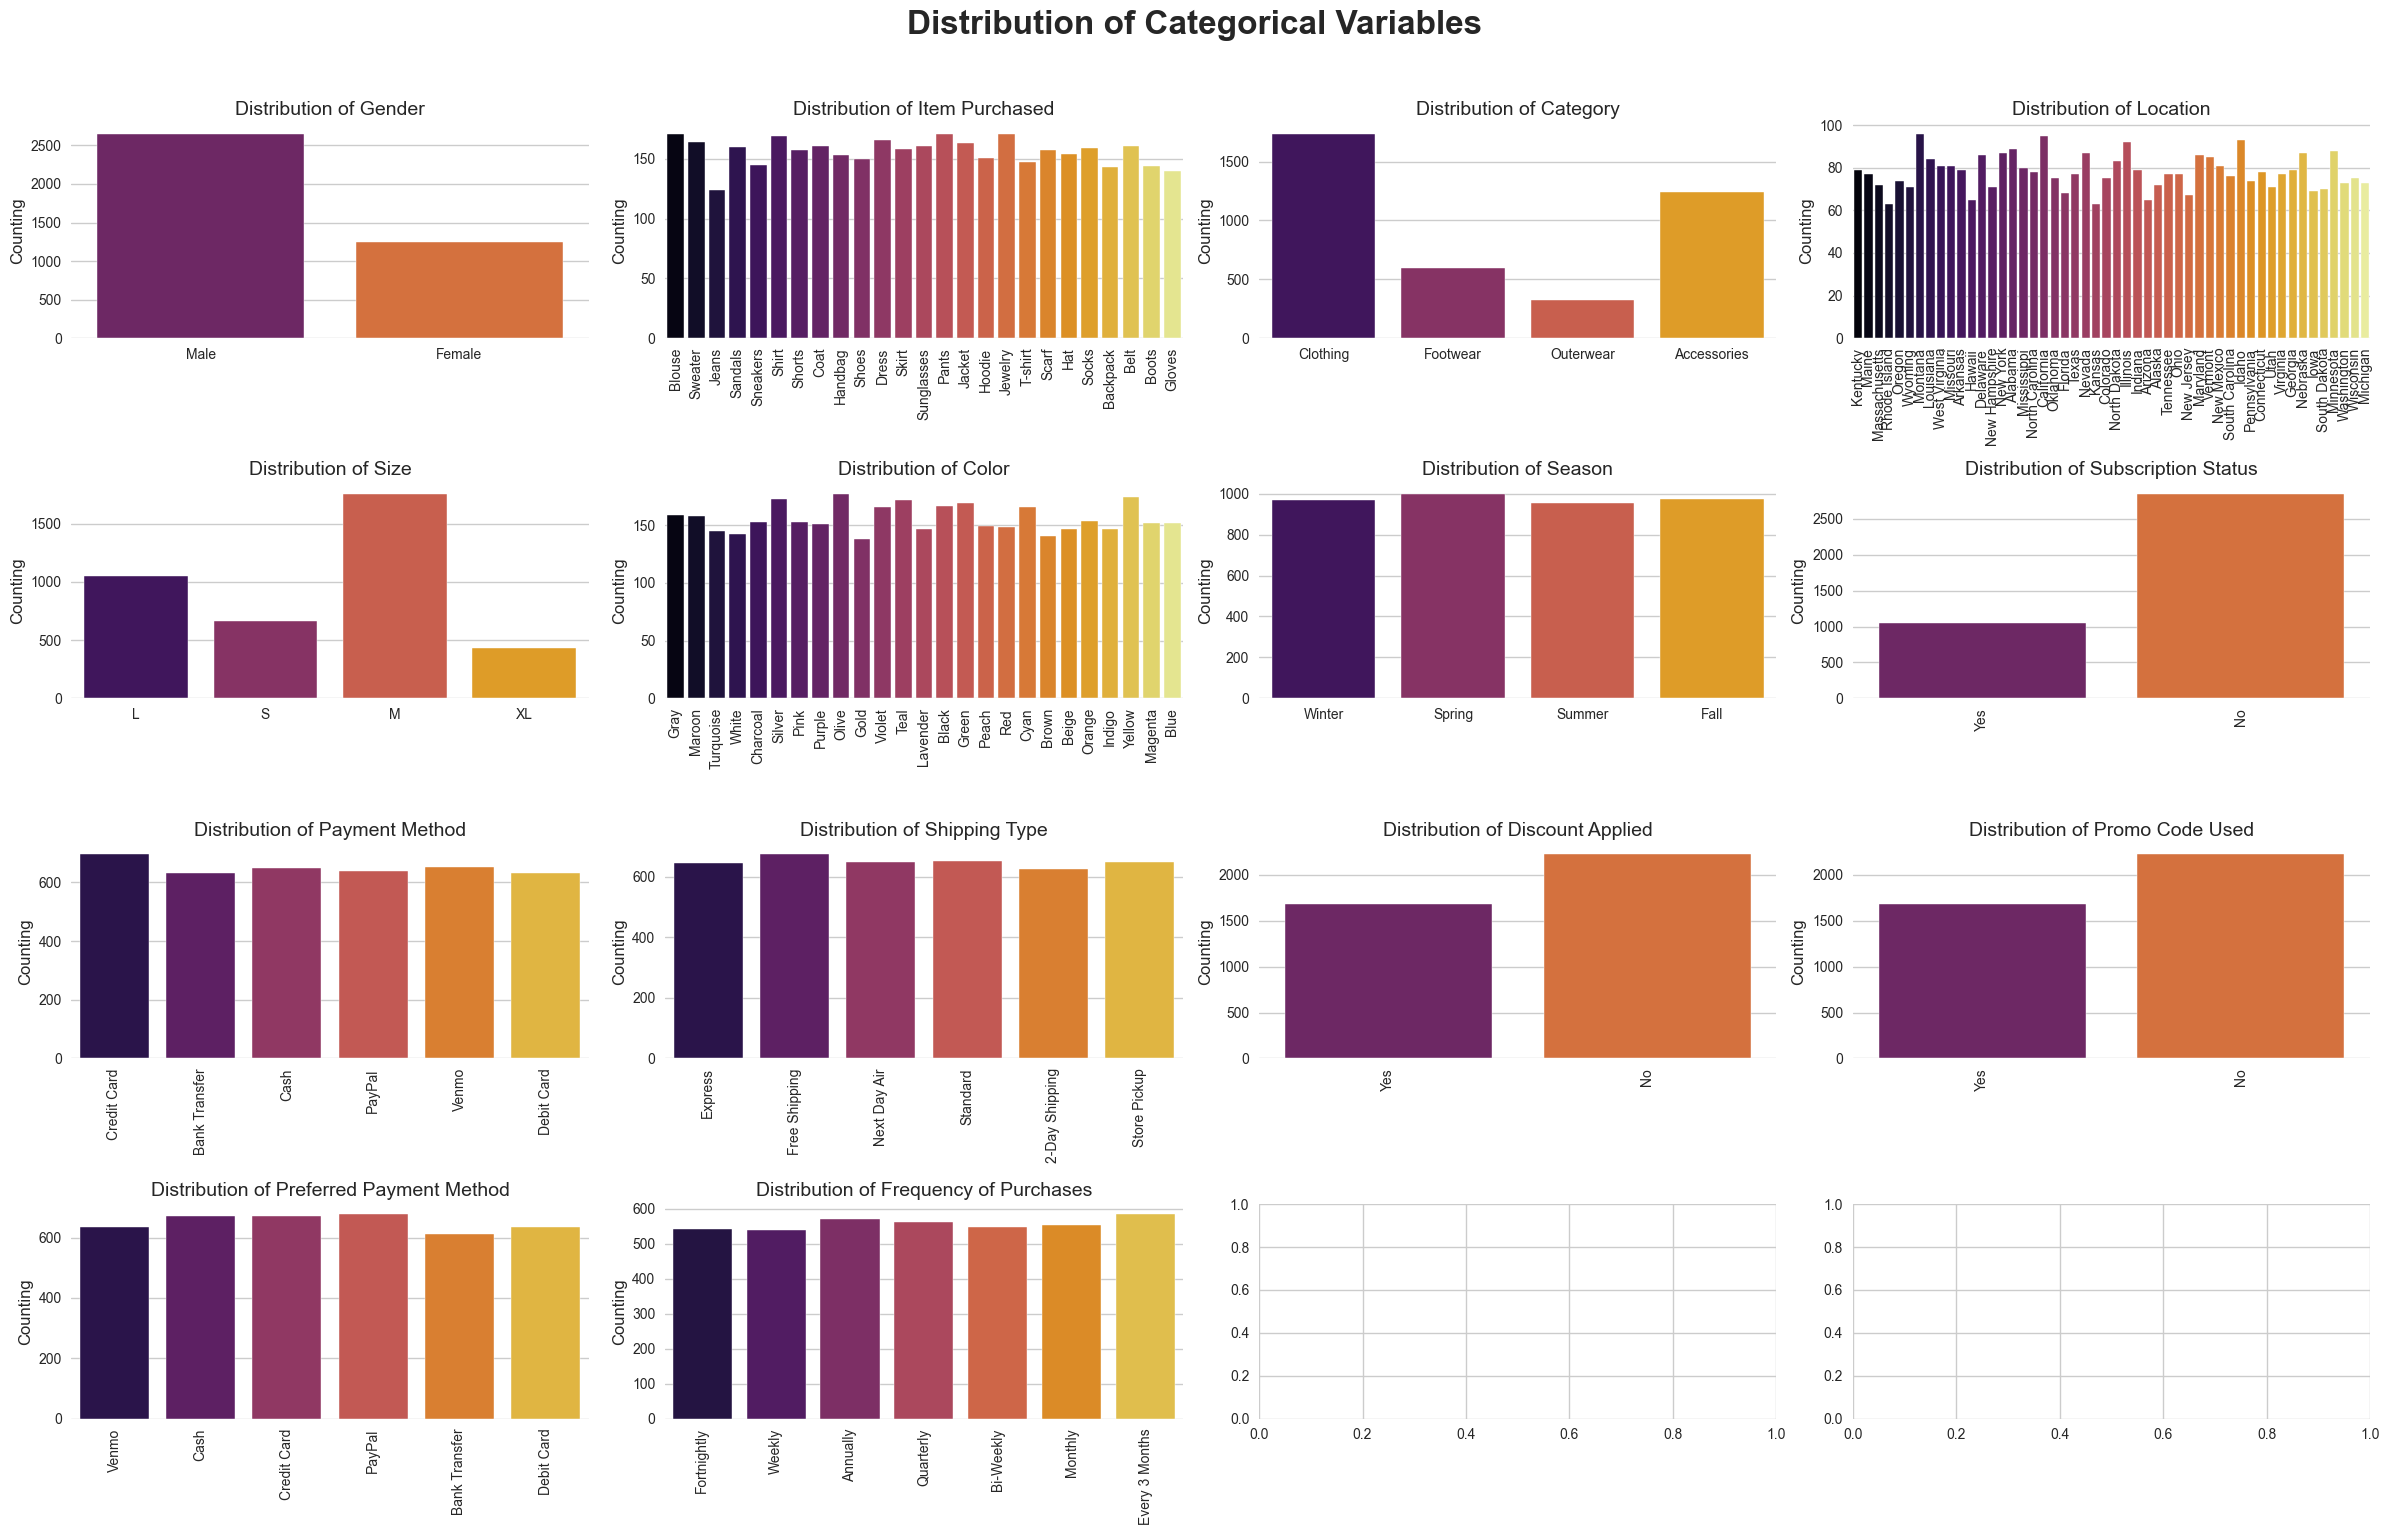

In [15]:
# defining the structure of the figure and the axes
fig, axs = plt.subplots(4, 4, figsize=(24, 15), tight_layout=True)

# defining a global title
fig.suptitle('Distribution of Categorical Variables', fontsize=24, weight='bold', y=1.02)


for i, (ax, col) in enumerate(zip(axs.flatten(), cols_categoric_graphics)):
    sns.countplot(data=df, x=col, ax=ax, palette='inferno') 

    ax.set_title(f'Distribution of {col}', fontsize=14)
    ax.set_xlabel('') 
    ax.set_ylabel('Counting', fontsize=12)

    if len(df[col].unique()) > 4 or len(col) > 14:
        ax.tick_params(axis='x', labelrotation=90)



plt.show()

### Insights from categorical column charts

**Gender:**
- **Distribution:** Clearly unbalanced, with a significant predominance of **male** customers.
- **Implication:** For hypothesis tests that compare groups by gender, e.g., “Do men spend more than women?” or “Do women evaluate products differently?”, this will need to be taken into account. The lower representation of women may impact the statistical power to detect differences in this group, or indicate a bias in data collection or in the business's target audience.

**Item Purchased:**
- **Distribution:** Although there are many different items, as we saw earlier through ‘describe’, the distribution shows that some items such as “Blouse” are purchased more often than others.
- **Implication:** This is good for product segmentation and inventory management. For hypothesis testing, e.g., “Is the average purchase value different for ‘Blouse’ versus ‘Shoes’?”

**Category:**
- **Distribution:** “Clothing” clearly dominates, followed by “Accessories.” ‘Footwear’ and “Outerwear” are less represented.
- **Implication:** We can benefit from this. Hypothesis testing can compare, for example, ratings across categories (`Review Rating` by `Category`), or the impact of discounts on different categories.

**Location:**
- **Distribution:** Customers are spread across a wide range of locations, with no single dominant region.
- **Implication:** Suggests a geographically dispersed customer base.

**Size:**
- **Distribution:** Size “M” (Medium) is the most sought after, followed by “L” (Large). ‘S’ (Small) and “XL” (Extra Large) have significantly lower demand.
- **Implication:** Important for inventory management and demand forecasting.

**Color:**
 - **Distribution:** No single color stands out as the best seller, indicating relatively even demand across several options.
- **Implication:** Reinforces a varied catalog with broad acceptance.

**Season:**
- **Distribution:** Sales are consistent across the four seasons (Winter, Spring, Summer, Fall), without a very strong seasonality in overall volume.
- **Implication:** The business is not highly seasonal, which is good news for sales stability.

**Subscription Status:**
- **Distribution:** The overwhelming majority of customers **do not have a subscription**.
- **Implication:** Indicates a great opportunity to convert one-time customers into subscribers.

**Payment Method and Preferred Payment Method:**
- **Distribution:** All payment methods are used with similar frequency, with “Credit Card” being slightly more used and “PayPal” more preferred.
- **Implication:** Customers value flexibility. Comparing actual usage (`Payment Method`) and preference (`Preferred Payment Method`) can be interesting to understand the barriers to using the preferred method.

**Shipping Type:**
- **Distribution:** All options are popular and used, with “Free Shipping” standing out slightly.
- **Implication:** This suggests that convenience and cost are important factors in the shipping decision.

**Discount Applied and Promo Code Used:**
- **Distribution:** A larger portion of transactions occur **without the use of discounts or promo codes**.
- **Implication:** This is a good sign for profit margins, as customers are willing to pay full price. As we noted in the `describe()` analysis, these two columns appear to be identical, which simplifies the analysis, as it is possible to treat them as a single variable to determine whether the purchase was promotional.

**Frequency of Purchases:**
- **Distribution:** Customers purchase at different frequencies (biweekly, weekly, annually, quarterly, monthly, every 3 months), all with balanced demand.
- **Implication:** Reinforces the need for retention and marketing strategies that adapt to different purchase cycles.

#### Insights dos graficos das colunas Categóricas

**Gender:**
- **Distribuição:** Claramente desequilibrada, com uma predominância significativa de clientes **Masculinos**.
- **Implicação:** Para testes de hipótese que comparem grupos por gênero, ex: "Homens gastam mais que Mulheres?" ou "Mulheres avaliam produtos de forma diferente?", isso precisará ser levado em consideração. A menor representatividade feminina pode impactar a potência estatística para detectar diferenças neste grupo, ou indicar um viés na coleta de dados ou no público-alvo do negócio.

**Item Purchased:**
- **Distribuição:** Embora haja muitos itens diferentes, como vimos anteriormente através do 'describe', a distribuição mostra que alguns itens como "Blouse" são mais frequentemente comprados do que outros.
- **Implicação:** Isso é bom para segmentação de produtos e gerenciamento de estoque. Para testes de hipótese, ex:"O valor de compra médio é diferente para 'Blouse' versus 'Shoes'?".

**Category:**
- **Distribuição:** "Clothing" domina claramente, seguida por "Accessories". "Footwear" e "Outerwear" são menos representados.
- **Implicação:** Podemos nos beneficiar disso. Testes de hipótese podem comparar, por exemplo, avaliações entre categorias (`Review Rating` por `Category`), ou o impacto de descontos em diferentes categorias.

**Location:**
- **Distribuição:** Os clientes estão distribuídos por uma vasta gama de localidades, sem uma única região dominante.
- **Implicação:** Sugere uma base de clientes geograficamente dispersa.

**Size:**
- **Distribuição:** O tamanho "M" (Médio) é o mais procurado, seguido por "L" (Grande). "S" (Pequeno) e "XL" (Extra Grande) têm demanda significativamente menor.
- **Implicação:** Importante para o gerenciamento de estoque e previsões de demanda.

**Color:**
 - **Distribuição:** Não existe uma cor que se destaque como a mais vendida, indicando uma demanda relativamente bem distribuída entre diversas opções.
- **Implicação:** Reforça um catálogo variado com ampla aceitação.

**Season:**
- **Distribuição:** As vendas são consistentes ao longo das quatro estações (Winter, Spring, Summer, Fall), sem uma sazonalidade muito forte em volume geral.
- **Implicação:** O negócio não é fortemente sazonal, o que é uma boa notícia para a estabilidade das vendas.

**Subscription Status:**
- **Distribuição:** A maioria esmagadora dos clientes **não possui uma assinatura**.
- **Implicação:** Indica uma grande oportunidade para converter clientes únicos em assinantes.

**Payment Method and Preferred Payment Method:**
- **Distribuição:** Todas as formas de pagamento são utilizadas com frequência semelhante, com "Credit Card" sendo ligeiramente mais usado e "PayPal" mais preferido.
- **Implicação:** Clientes valorizam flexibilidade. A comparação entre uso real (`Payment Method`) e preferência (`Preferred Payment Method`) pode ser interessante para entender as barreiras para o uso do método preferido.

**Shipping Type:**
- **Distribuição:** Todas as opções são populares e utilizadas, com "Free Shipping" se destacando um pouco.
- **Implicação:** Sugere que a conveniência e o custo são fatores importantes na decisão de envio.

**Discount Applied and Promo Code Used:**
- **Distribuição:** Uma parcela maior de transações ocorre **sem o uso de descontos ou códigos promocionais**.
- **Implicação:** Isso é um bom sinal para as margens de lucro, pois os clientes estão dispostos a pagar o preço integral. Como observamos na análise do `describe()`, estas duas colunas parecem ser idênticas, o que simplifica a análise, pois é possível tratar como uma única variável para saber se a compra teve alguma promoção.

**Frequency of Purchases:**
- **Distribuição:** Os clientes compram com diversas frequências (quinzenal, semanal, anual, trimestral, mensal, a cada 3 meses), todas com demanda equilibrada.
- **Implicação:** Reforça a necessidade de estratégias de retenção e marketing que se adaptem a diferentes ciclos de compra.

In [16]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

### Feature Engineering

In [17]:
df['Discount Applied'].value_counts()

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64

In [18]:
df['Promo Code Used'].value_counts()

Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64

- As discussed earlier, these columns contain redundant information, so it would be useful to combine them into a single column.

In [19]:
# copying the original dataframe to maintain integrity
df_copy = df.copy()
df_copy.shape

(3900, 19)

In [20]:
# creating a more informative column
df_copy['Has Promotion'] = np.where(
    (df_copy['Discount Applied'] == 'Yes') | (df_copy['Promo Code Used'] == 'Yes'),
    'Yes',
    'No'
)

df_copy['Has Promotion'].value_counts()

Has Promotion
No     2223
Yes    1677
Name: count, dtype: int64

In [21]:
# dropping redundant columns
df_copy.drop(['Discount Applied', 'Promo Code Used'], axis=1, inplace=True)

In [22]:
# creating more informative age groups
bins = [18, 30, 50, 65, np.inf]
labels = ['Young Adults (18-29)', 'Adults (30-49)', 'Middle age (50-64)', 'Seniors (65+)']

df_copy['Age Group'] = pd.cut(df_copy['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

In [23]:
df_copy['Age Group'].value_counts()

Age Group
Adults (30-49)          1463
Middle age (50-64)      1132
Young Adults (18-29)     878
Seniors (65+)            427
Name: count, dtype: int64

In [24]:
# identifying binary columns
binary_cols = []

for col in df_copy.select_dtypes(include=['object', 'category', 'bool']).columns:
    values_unique = df_copy[col].dropna().unique()

    if len(values_unique) == 2:
        binary_cols.append(col)


print(f'Colunas binárias: {binary_cols}')

Colunas binárias: ['Gender', 'Subscription Status', 'Has Promotion']


In [25]:
# mapping binary columns
df_copy['Gender Binary'] = df_copy['Gender'].map({'Male': 1, 'Female': 0})

df_copy['Subscription Status Binary'] = df_copy['Subscription Status'].map({'Yes': 1, 'No': 0})

df_copy['Has Promotion Binary'] = df_copy['Has Promotion'].map({'Yes': 1, 'No': 0})

In [26]:
df_copy[['Gender', 'Gender Binary', 'Subscription Status', 'Subscription Status Binary', 'Has Promotion', 'Has Promotion Binary']].head()

,Gender,Gender Binary,Subscription Status,Subscription Status Binary,Has Promotion,Has Promotion Binary
0,Male,1,Yes,1,Yes,1
1,Male,1,Yes,1,Yes,1
2,Male,1,Yes,1,Yes,1
3,Male,1,Yes,1,Yes,1
4,Male,1,Yes,1,Yes,1


In [27]:
df_copy[['Gender', 'Gender Binary', 'Subscription Status', 'Subscription Status Binary', 'Has Promotion', 'Has Promotion Binary']].tail()


,Gender,Gender Binary,Subscription Status,Subscription Status Binary,Has Promotion,Has Promotion Binary
3895,Female,0,No,0,No,0
3896,Female,0,No,0,No,0
3897,Female,0,No,0,No,0
3898,Female,0,No,0,No,0
3899,Female,0,No,0,No,0


In [28]:
print(df_copy['Gender Binary'].value_counts())
print()
print(df_copy['Subscription Status Binary'].value_counts())
print()
print(df_copy['Has Promotion Binary'].value_counts())

Gender Binary
1    2652
0    1248
Name: count, dtype: int64

Subscription Status Binary
0    2847
1    1053
Name: count, dtype: int64

Has Promotion Binary
0    2223
1    1677
Name: count, dtype: int64


In [ ]:
df_copy.to_csv('../data/processed/data_processed.csv', index=False)